# AMAZON LUXURY BEAUTY PRODUCTS REVIEW FOR SENTIMENT ANALYSIS

THIS IS THE DEVELOPMENT OF A CASE STUDY TO GROW MY PORTFOLIO AS A DATA ANALYST.

MY PURPOSE IS TO ANALYSE THE REVIEWS OF THE USERS THAT BOUGHT AND TRIED LUXURY BEAUTY PRODUCTS WITH NATURAL LANGUAGE PROCESSING TECHNIQUES. THEN I WILL DEVELOP A RECOMMENDATION SYSTEM BASED ON THE RESULTS.

IN THIS PROJECT SIMULACRA, I INTEND TO FOLLOW A COMBINATION OF LEAN AND AGILE METHODOLOGIES.  
  
FOR THE AGILE METHODOLOGY, I WILL TAKE THE FLEXIBILITY AND ADAPTABILITY IN ORDER TO ADJUST AND IMPROVE THE MODEL AS TIME PASSES, DIVIDING THE WORK INTO SHORT SPRINTS THAT WILL ENSURE TO MAXIMIZE THE EFFICIENCY OF THE RESULTS. ALSO, THERE'S THE POSSIBILITY TO IMPROVE THE TEAMWORK COLLABORATION WITH THE STAKEHOLDERS, RECEIVING REGULAR FEEDBACK.
  
AS FOR THE LEAN METHODOLOGY, THE SCOPE OF THE PROJECT WILL BE THE SEARCH FOR CONTINUOUS IMPROVEMENT TO DELIVER VALUABLE PRODUCTS TO THE CLIENTS, ELIMINATING WASTE AND FINDING WAYS TO BE MORE EFFICIENT.

1.-OBJECTIVE:

* TO DEVELOP A RECOMMENDATION SYSTEM THAT INCORPORATES SENTIMENT ANALYSIS ON AMAZON LUXURY BEAUTY PRODUCT REVIEWS

2.- PLANNING

* I WILL USE THE LUXURY BEAUTY SUBSET PROVIDED ON THIS LINK https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/ TO EXTRACT THE NECESSARY DATA
* I WILL USE PYTHON LIBRARIES TO EXTRACT THE DATA, ANALYSE IT, PERFORM THE SENTIMENT ANALYSIS AND DEVELOP THE ML RECOMMENDATION SYSTEM

3.- METHODOLOGY

* ACCORDING TO THE COMBINATION OF AGILE AND LEAN METHODOLOGIES, I WILL DIVIDE MY WORK IN SPRINTS:  
      
    #### *FIRST SPRINT*  
    WILL CONSIST ON EXTRACTION, REVIEW, CLEANING AND PERFORMING AN EXPLORATORY ANALYSIS ON THE DATA  
      
    #### *SECOND SPRINT*  
    WILL CONSIST ON THE SENTIMENT ANALYSIS, IMPLEMENTING ALGORITHMS TO CLASIFY THE REVIEWS  
      
    #### *THIRD SPRINT*  
    WILL CONSIST ON THE DEVELOPMENT ON THE RECOMMENDATION SYSTEM BASED ON THE RESULTS OF THE PREVIOUS STEPS  
      
4.- VALUE AND EFFICIENCY
* I'LL ENSURE THAT THE QUALITY OF THE DATA ASWELL BY SELECTING THE BEST ASPECTOS OF THE DATASETS AND TAKE OUT EVERYTHING UNNECESSARY FOR THE PROJECT

## SPRINT 1: EXTRACTION, REVIEW, CLEANING AND EXPLORATORY ANALYSIS

IMPORTING LIBRARIES AND EXTRACTING THE DATA

In [93]:
import pandas as pd
import json
import html
import re
import matplotlib.pyplot  as plt
import string
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
nlp = English()
nlp.max_length = 5000000
tokenizer = nlp.tokenizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# loading the review file
with open('/content/drive/MyDrive/Video /Luxury_Beauty-reviews.json', 'r') as file:
    reviews_data = [json.loads(line) for line in file]

df_reviews = pd.DataFrame(reviews_data)

with open('/content/drive/MyDrive/Video /meta_Luxury_Beauty.json', 'r') as file:
    metadata_data = [json.loads(line) for line in file]

df_metadata = pd.DataFrame(metadata_data)

In [4]:
df_reviews.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         574628 non-null  float64
 1   vote            103689 non-null  object 
 2   verified        574628 non-null  bool   
 3   reviewTime      574628 non-null  object 
 4   reviewerID      574628 non-null  object 
 5   asin            574628 non-null  object 
 6   reviewerName    574597 non-null  object 
 7   reviewText      574228 non-null  object 
 8   summary         574445 non-null  object 
 9   unixReviewTime  574628 non-null  int64  
 10  style           251013 non-null  object 
 11  image           7418 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 48.8+ MB


In [6]:
df_reviews.describe()

,overall,unixReviewTime
count,574628.000000,5.746280e+05
mean,4.225622,1.447113e+09
std,1.297522,5.695908e+07
min,1.000000,1.075248e+09
25%,4.000000,1.414627e+09
50%,5.000000,1.455149e+09
75%,5.000000,1.490054e+09
max,5.000000,1.538179e+09


WITH THIS FIRST EXPLORATION THE FOLLOWING ACTIONS ARE NECESSARY:

1.- DROP COLUMNS "vote", "verified", "unixReviewTime", "style" and "image"  

In [7]:
df_reviews = df_reviews.drop(['vote', 'verified', 'unixReviewTime' ,'style', 'image'], axis=1)
df_reviews

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,2.0,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5.0,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5.0,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars
3,5.0,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars
4,5.0,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.
...,...,...,...,...,...,...,...
574623,5.0,"03 20, 2017",AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars
574624,5.0,"10 26, 2016",A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used
574625,5.0,"09 30, 2016",A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!
574626,1.0,"12 5, 2016",A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month


2.- DROP ROWS THAT ARE NULL IN COLUM "reviewText"  

In [8]:
rows_with_null_reviewText = df_reviews[df_reviews['reviewText'].isnull()]
rows_with_null_reviewText

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
356,5.0,"02 12, 2016",A22JHH2KJ1KSZS,B00004U9V2,tamika nurradin,NaN,Five Stars
1946,5.0,"07 1, 2016",A13KF8D6S751K9,B0000ZREXG,Mubarak A.,NaN,Five Stars
1950,5.0,"05 9, 2016",A3DJFTNF0SWHXF,B0000ZREXG,Maha alenezi,NaN,Five Stars
2146,5.0,"11 15, 2017",A198TNJ3GIPV34,B00011QUKW,Kali Smith,NaN,Five Stars
2493,5.0,"04 14, 2018",A2ZIJFRO8RRZ7D,B000142FVW,Amazon Customer,NaN,Just like the salon!
...,...,...,...,...,...,...,...
570721,5.0,"06 2, 2018",A3A323V0CFQ04G,B01BZV8CPM,carlos,NaN,"Fantastic selection for ""free"""
571561,5.0,"01 1, 2018",A3E5GLLTB3CL9,B01CTBK9A8,Carrie ORear,NaN,Said it before love this product
571572,5.0,"11 30, 2017",AWXLAOZEP3WB0,B01CTK0EE0,JENNIE,NaN,Awesome!
572108,5.0,"03 12, 2017",A1VDB90WB423TS,B01DOORI7Q,Amazon Customer,NaN,Five Stars


In [9]:
df_reviews = df_reviews.dropna(subset= ['reviewText'])
df_reviews

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,2.0,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5.0,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5.0,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars
3,5.0,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars
4,5.0,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.
...,...,...,...,...,...,...,...
574623,5.0,"03 20, 2017",AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars
574624,5.0,"10 26, 2016",A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used
574625,5.0,"09 30, 2016",A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!
574626,1.0,"12 5, 2016",A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month


In [10]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574228 entries, 0 to 574627
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   overall       574228 non-null  float64
 1   reviewTime    574228 non-null  object 
 2   reviewerID    574228 non-null  object 
 3   asin          574228 non-null  object 
 4   reviewerName  574197 non-null  object 
 5   reviewText    574228 non-null  object 
 6   summary       574053 non-null  object 
dtypes: float64(1), object(6)
memory usage: 35.0+ MB


2.1.- RESETTING THE INDEX

In [11]:
df_reviews = df_reviews.reset_index(drop = True)
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574228 entries, 0 to 574227
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   overall       574228 non-null  float64
 1   reviewTime    574228 non-null  object 
 2   reviewerID    574228 non-null  object 
 3   asin          574228 non-null  object 
 4   reviewerName  574197 non-null  object 
 5   reviewText    574228 non-null  object 
 6   summary       574053 non-null  object 
dtypes: float64(1), object(6)
memory usage: 30.7+ MB


3.- CONVERT TO DATE COLUMN "reviewTime"  

In [12]:
df_reviews['reviewTime'] =  pd.to_datetime(df_reviews['reviewTime'], format='%m %d, %Y', errors='coerce')

df_reviews['reviewTime'].head()

0   2010-06-15
1   2010-01-07
2   2018-04-18
3   2018-04-18
4   2018-04-17
Name: reviewTime, dtype: datetime64[ns]

In [13]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574228 entries, 0 to 574227
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   overall       574228 non-null  float64       
 1   reviewTime    574228 non-null  datetime64[ns]
 2   reviewerID    574228 non-null  object        
 3   asin          574228 non-null  object        
 4   reviewerName  574197 non-null  object        
 5   reviewText    574228 non-null  object        
 6   summary       574053 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 30.7+ MB


4.- CREATE NEW DATASET WITH CLEAN VALUES

In [14]:
reviews_clean = df_reviews

reviews_clean.head()

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,2.0,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5.0,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5.0,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars
3,5.0,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars
4,5.0,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.


NOW LET'S DO THE SAME WITH THE METADATA DATASET

In [15]:
df_metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,,,B0000531EN,[],[]
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,,,B0000532JH,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,,$15.99,B00005A77F,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,,$18.00,B00005NDTD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [16]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         12299 non-null  object
 1   tech1            12299 non-null  object
 2   description      12299 non-null  object
 3   fit              12299 non-null  object
 4   title            12299 non-null  object
 5   also_buy         12299 non-null  object
 6   tech2            12299 non-null  object
 7   brand            12299 non-null  object
 8   feature          12299 non-null  object
 9   rank             12299 non-null  object
 10  also_view        12299 non-null  object
 11  details          12299 non-null  object
 12  main_cat         12299 non-null  object
 13  similar_item     12299 non-null  object
 14  date             12299 non-null  object
 15  price            12299 non-null  object
 16  asin             12299 non-null  object
 17  imageURL         12299 non-null

LET'S DROP THE UNNECESARY COLUMNS

In [17]:
columns_to_drop = ['category','tech1','fit', 'also_buy', 'tech2','brand', 'feature',
                   'rank', 'also_view', 'details', 'main_cat', 'similar_item', 'date',
                   'imageURL', 'imageURLHighRes']

df_metadata = df_metadata.drop(columns=columns_to_drop)

df_metadata.head()

,description,title,price,asin
0,[After a long day of handling thorny situation...,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,$30.00,B00004U9V2
1,[If you haven't experienced the pleasures of b...,AHAVA Bath Salts,,B0000531EN
2,"[Rich, black mineral mud, harvested from the b...","AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",,B0000532JH
3,[This liquid soap with convenient pump dispens...,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",$15.99,B00005A77F
4,[Remember why you love your favorite blanket? ...,Soy Milk Hand Crme,$18.00,B00005NDTD


NOW I'LL STICK TO THE "title" COLUMN TO DO SOME FORMATTING

CREATING A FUNCTION TO DO ALL THE FORMATTING

In [18]:
df_metadata['title'] = df_metadata['title'].apply(html.unescape)

def clean_text(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

# APPLY THE FUNCTION TO "title" COLUMN
df_metadata['title'] = df_metadata['title'].apply(clean_text)

df_metadata['title']

0        crabtree evelyn gardeners ultramoisturising ha...
1                                         ahava bath salts
2               ahava dead sea mineral mud 85 oz pack of 4
3            crabtree evelyn hand soap gardeners 101 fl oz
4                                       soy milk hand crme
                               ...                        
12294               cnd shellac power polish patina buckle
12295                 cnd shellac power polish denim patch
12296                          cnd shellac leather satchel
12297    juicy couture i love juicy couture 17 fl oz pe...
12298    juicy couture i love juicy couture 34 fl oz pe...
Name: title, Length: 12299, dtype: object

In [19]:
df_metadata

,description,title,price,asin
0,[After a long day of handling thorny situation...,crabtree evelyn gardeners ultramoisturising ha...,$30.00,B00004U9V2
1,[If you haven't experienced the pleasures of b...,ahava bath salts,,B0000531EN
2,"[Rich, black mineral mud, harvested from the b...",ahava dead sea mineral mud 85 oz pack of 4,,B0000532JH
3,[This liquid soap with convenient pump dispens...,crabtree evelyn hand soap gardeners 101 fl oz,$15.99,B00005A77F
4,[Remember why you love your favorite blanket? ...,soy milk hand crme,$18.00,B00005NDTD
...,...,...,...,...
12294,"[, CND Craft Culture Collection: Patina Buckle...",cnd shellac power polish patina buckle,$15.95,B01HIQIEYC
12295,[CND Shellac was designed to be used as a syst...,cnd shellac power polish denim patch,$15.95,B01HIQHQU0
12296,[CND Shellac was designed to be used as a syst...,cnd shellac leather satchel,$15.95,B01HIQEOLO
12297,[The I AM JUICY COUTURE girl is once again tak...,juicy couture i love juicy couture 17 fl oz pe...,$76.00,B01HJ2UY0W


### NOW, LET'S MOVE TO PERFORM AN E.D.A (EXPLORATORY DATA ANALYSIS)

DISTRIBUTION OF REVIEWS  
  
I'LL USE THE "overall" COLUMN TO KNOW THE DISTRIBUTION OF THE REVIEWS.  
IN THIS CASE THE BEST WAY TO OBSERVE IT IS WITH A BAR CHART

In [20]:
reviews_clean.head(10)

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,2.0,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5.0,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5.0,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars
3,5.0,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars
4,5.0,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.
5,5.0,2018-04-14,AXX5G4LFF12R6,B00004U9V2,Ralla,Ive used this lotion for many years. I try oth...,Ive used this lotion for many years. I try ...
6,5.0,2018-04-11,A7GUKMOJT2NR6,B00004U9V2,Lydia Speight,Works great for dry hands.,Five Stars
7,5.0,2018-04-11,A3FU4L59BHA9FY,B00004U9V2,Allen Semer,The best hand cream ever.,Made in the USA
8,5.0,2018-04-07,A1AMNMIPQMXH9M,B00004U9V2,Vets park,LOVE THIS SCENT!! But Crabtree and Evelyn mak...,Moistens and smells good
9,5.0,2018-04-06,A3DMBDTA8VGWSX,B00004U9V2,Cynthia P. Irving,Its a great moisturizer especially for gardners,Five Stars


In [21]:
reviews_clean['overall'].value_counts().sort_index()

1.0     50477
2.0     29502
3.0     41975
4.0     70451
5.0    381823
Name: overall, dtype: int64

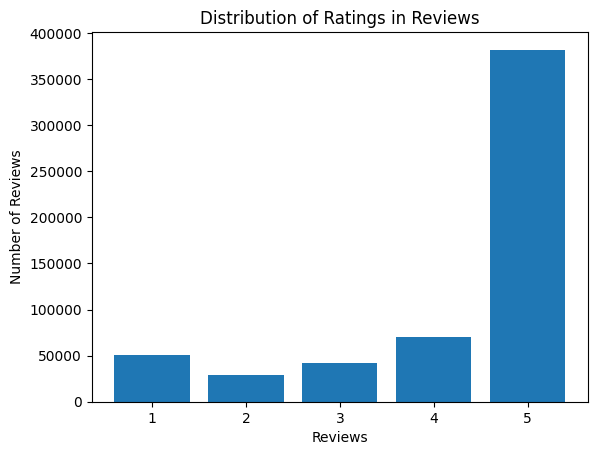

In [22]:

reviews = reviews_clean['overall'].value_counts().sort_index()

plt.bar(reviews.index, reviews.values)
plt.xlabel('Reviews')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings in Reviews')
plt.show()


THERE ARE SOME PARCIAL CONCLUSIONS:

*Positive Trend*:  
The large number of 5-star ratings indicates that the majority of users are highly satisfied with the products in this category.  
This is a good indicator of the overall positive perception.
  
*Positive Rating Bias*:  
In many review platforms, a phenomenon known as "positive rating bias" is observed, where users tend to leave reviews when they are particularly satisfied.  
This could explain the high proportion of 5-star ratings.
  
*Importance of Negative Reviews*:  
Although fewer in number, the 1 and 2-star ratings are significant and could offer valuable insights into potential issues or areas for improvement for the products.
  
*Sentiment Analysis in Low-Rating Reviews*:  
It would be interesting to analyze the content of reviews with low ratings to understand the reasons behind customer dissatisfaction.
  
*Comparison with Other Categories*:  
It would be useful to compare this distribution with other categories to see if the positive trend is unique to "Luxury Beauty" products.
  
*Product Context*:  
Consider the context of "Luxury Beauty" products.  
Customers might have higher expectations, which could influence their perception and how they rate the products.
  
*Analysis of Temporal Trends*:  
If data allows, analyze how ratings have changed over time. This could reveal emerging trends or shifts in customer perception.

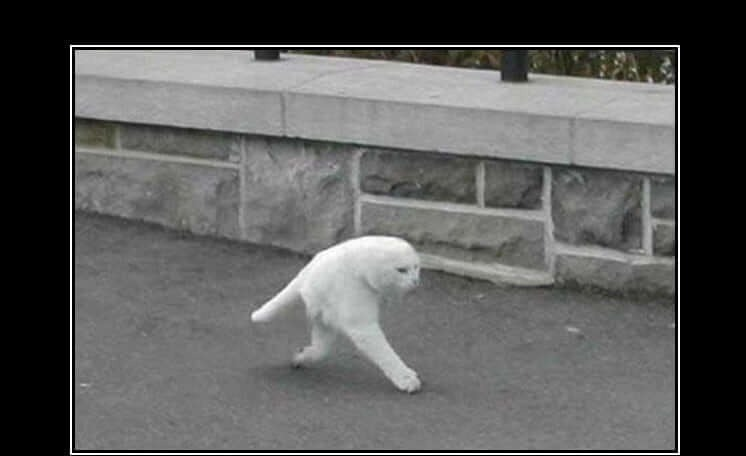## SPRINT 2: CLASSIFYING REVIEWS AND PERFORMING SENTIMENT ANALYSIS

NOW I'LL ANALYSE THE LENGHT OF THE REVIEWS IN ORDER TO OBTAIN SOME INSIGHTS ABOUT USER BEHAVIOUR AND OPINIONS  

In [23]:
reviews_clean


,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,2.0,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5.0,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5.0,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars
3,5.0,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars
4,5.0,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.
...,...,...,...,...,...,...,...
574223,5.0,2017-03-20,AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars
574224,5.0,2016-10-26,A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used
574225,5.0,2016-09-30,A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!
574226,1.0,2016-12-05,A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month


In [24]:
# LET'S MAKE A COPY OF THE DATASET

review_copy = reviews_clean.copy()

FIRST, LET'S APPLY A FUNCTION WE MADE TO FORMAT "reviewText" COLUMN:

In [75]:
def clean_review_text(text):
    # verify if text is a str
    if isinstance(text, str):
        # lower
        text = text.lower()

        # deleting punctuation marks
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)

        # deleting numbers
        text = re.sub(r'\d+', '', text)

        # deleting extra blank spaces
        text = text.strip()
        text = re.sub(r'\s+', ' ', text)

    else:
        text = ''

    return text

review_copy['reviewText_clean'] = review_copy['reviewText'].apply(clean_review_text)

review_copy

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,reviewText_clean,review_length,segment_length,Year,summary_clean
0,2.0,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,i bought two of these fl oz hand cream and nei...,43,Short,2010,dispensers dont work
1,5.0,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,believe me over the years i have tried many ma...,102,Medium,2010,best hand cream ever
2,5.0,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,great hand lotion,3,Short,2018,five stars
3,5.0,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,this is the best for the severely dry skin on ...,12,Short,2018,five stars
4,5.0,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,the best non oily hand cream ever it heals ove...,10,Short,2018,i always have a backup ready
...,...,...,...,...,...,...,...,...,...,...,...,...
574223,5.0,2017-03-20,AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars,great color and i prefer shellac over gel,8,Short,2017,five stars
574224,5.0,2016-10-26,A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used,best shellac i have ever used it doesnt take o...,23,Short,2016,best shellac i have ever used
574225,5.0,2016-09-30,A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!,great polish and beautiful color,5,Short,2016,great polish
574226,1.0,2016-12-05,A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,the perfume is good but the spray head broke off,10,Short,2016,spray head broke off within a month


NOW THAT WE FORMATED THE COLUMN, LET'S CONTINUE THE ANALYSIS.  
  
FIRST, LET'S SEE HOW THE RATINGS ARE DISTRIBUTED ALONG THE DATA

In [26]:
# I'LL CREATE A NEW COLUMN CALLED "review_length" THAT WILL SHOW THE LENGTH OF EACH REVIEW
review_copy['review_length'] = review_copy['reviewText_clean'].apply(lambda x: len(x.split()))

review_copy

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,reviewText_clean,review_length
0,2.0,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,i bought two of these fl oz hand cream and nei...,43
1,5.0,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,believe me over the years i have tried many ma...,102
2,5.0,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,great hand lotion,3
3,5.0,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,this is the best for the severely dry skin on ...,12
4,5.0,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,the best non oily hand cream ever it heals ove...,10
...,...,...,...,...,...,...,...,...,...
574223,5.0,2017-03-20,AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars,great color and i prefer shellac over gel,8
574224,5.0,2016-10-26,A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used,best shellac i have ever used it doesnt take o...,23
574225,5.0,2016-09-30,A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!,great polish and beautiful color,5
574226,1.0,2016-12-05,A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,the perfume is good but the spray head broke off,10


In [ ]:
review_copy['review_length'].describe()

count    574228.000000
mean         40.553019
std          57.849471
min           0.000000
25%           9.000000
50%          23.000000
75%          49.000000
max        2879.000000
Name: review_length, dtype: float64

In [27]:
# THIS IS THE DISTRIBUTION OF EACH REVIEW LENGTH ACCORDING TO PERCENTILES

percentiles = pd.qcut(review_copy['review_length'], q=[0, 0.25, 0.5, 0.75, 1], duplicates='drop')
conteo_percentiles = percentiles.value_counts().sort_index()
conteo_percentiles

(-0.001, 9.0]     150782
(9.0, 23.0]       141458
(23.0, 49.0]      140071
(49.0, 2879.0]    141917
Name: review_length, dtype: int64

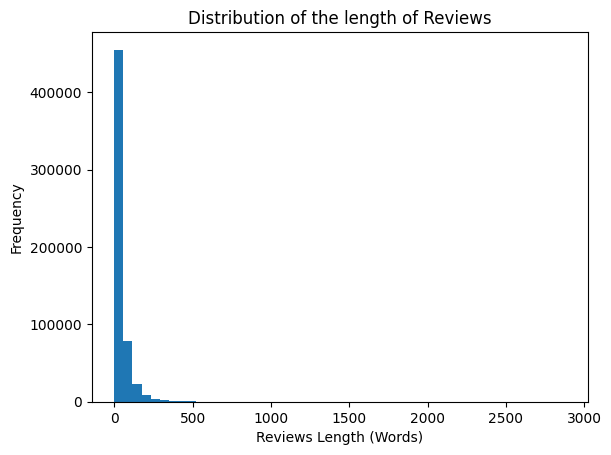

In [28]:
plt.hist(review_copy['review_length'], bins=50)
plt.xlabel('Reviews Length (Words)')
plt.ylabel('Frequency')
plt.title('Distribution of the length of Reviews')
plt.show()

LET'S ZOOM IN THE CHART TO EXTRACT BETTER INSIGHTS

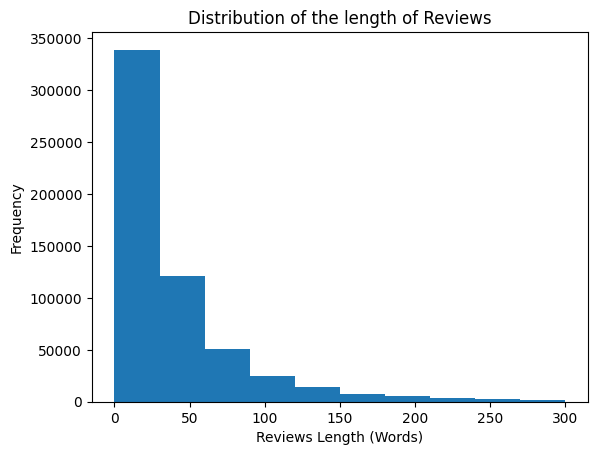

In [ ]:
plt.hist(review_copy['review_length'], bins=10, range=(0,300))
plt.xlabel('Reviews Length (Words)')
plt.ylabel('Frequency')
plt.title('Distribution of the length of Reviews')
plt.show()


THE VAST MAJORITY OF REVIEWS ARE BETWEEN 1 AND 50 WORDS.  
LET'S EXPLORE THE RELATIONSHIP BETWEN LENGHT OF REVIEW AND RATING

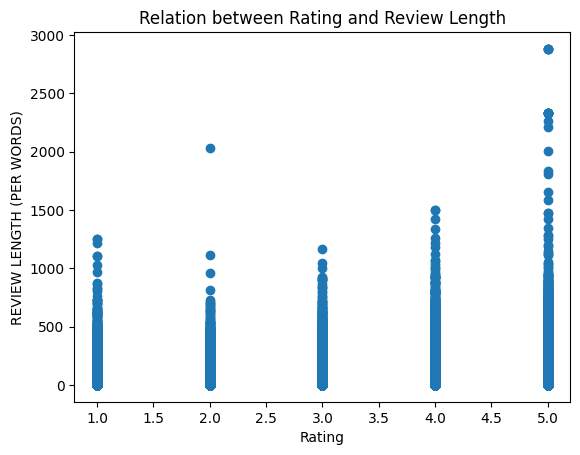

In [ ]:
plt.scatter(review_copy['overall'], review_copy['review_length'])
plt.xlabel('Rating')
plt.ylabel('REVIEW LENGTH (PER WORDS)')
plt.title('Relation between Rating and Review Length')
plt.show()


WE CAN SEE THAT POSITIVE REVIEWS ARE A BIT LONGER THAN NEGATIVE ONES, ALTHOUGH ON AVERAGE THEY ARE THE SAME LENGTH  
BUT WE DON'T KNOW THE EXACT CONTENT OF EACH REVIEW    
PERHAPS THOSE WHO RATE NEGATIVELY CAN GIVE US INFORMATION ON WHAT WENT WRONG WITH THEIR EXPERIENCE, WHILE THE MOST SATISFIED ONES CAN EXPLAIN WHAT IS SO FABULOUS.  
  
SINCE WE WANT TO FIND OUT WHAT THE USERS HAVE TO SAY, FIRST LET'S DIVIDE EACH REVIEW BY RATING JUST TO SEE SOME EXAMPLES  

In [29]:
short_length = 50  #LESS THAN 50 WORDS
long_length = 300  # MORE THAN 300 WORDS

# filter each length by Filtrar reseñas largas y cortas por cada calificación
short_reviews = review_copy[review_copy['review_length'] < short_length]
long_reviews = review_copy[review_copy['review_length'] > long_length]

# LET'S EXPLORE THE CONTENT FOR SOME OF THE REVIEWS ACCORDING TO THE RATING
for rating in range(1, 6):
    print(f"Rating {rating} - Short Reviews:")
    print(short_reviews[short_reviews['overall'] == rating]['reviewText_clean'].head())
    print(f"\nRating {rating} - Long Reviews:")
    print(long_reviews[long_reviews['overall'] == rating]['reviewText_clean'].head())
    print("\n")


Rating 1 - Short Reviews:
19    soooo not worth the money packaging is aweful ...
31    this smells like mens cologne i thought it wou...
74    maybe im just not familiar with this brand but...
78    love this lotion but it arrived dented all ove...
84                              too little for the cost
Name: reviewText_clean, dtype: object

Rating 1 - Long Reviews:
2003     ive had kp since i was about im now and i rece...
11855    love the smell of the cologne so i wanted to g...
14786    i am disgusted to recently have learned that t...
14803    because i saw that amazon had this as a gold b...
14842    dermatol surg feb related articles links compa...
Name: reviewText_clean, dtype: object


Rating 2 - Short Reviews:
0      i bought two of these fl oz hand cream and nei...
94     so sorry that they changed the formula this wa...
143    tiny tube for the money thought it was a larag...
164    i had hope given the rave reviews but this did...
248                                      

NOW I'LL PERFORM A SEGMENTATION OF EACH REVIEW BY ITS LENGTH AND SHOW THE DISTRIBUTION OF RATINGS IN EACH SEGMENT  
IN ORDER TO UNDERSTAND IF THE LENGTH OF THE REVIEWS INFLUENCES THE RATING GIVEN BY USERS

In [ ]:
review_copy

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,reviewText_clean,review_length
0,2.0,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,i bought two of these fl oz hand cream and nei...,43
1,5.0,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,believe me over the years i have tried many ma...,102
2,5.0,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,great hand lotion,3
3,5.0,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,this is the best for the severely dry skin on ...,12
4,5.0,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,the best non oily hand cream ever it heals ove...,10
...,...,...,...,...,...,...,...,...,...,...
574223,5.0,2017-03-20,AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars,1489968000,great color and i prefer shellac over gel,8
574224,5.0,2016-10-26,A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used,1477440000,best shellac i have ever used it doesnt take o...,23
574225,5.0,2016-09-30,A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!,1475193600,great polish and beautiful color,5
574226,1.0,2016-12-05,A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,1480896000,the perfume is good but the spray head broke off,10


In [30]:
# LET'S CREATE A FUNCTION TO CATEGORIZE THE LENGTH OF EACH REVIEW
def categorize_length(longitud):
    if longitud < 50:
        return 'Short'
    elif 50 <= longitud <= 250:
        return 'Medium'
    else:
        return 'Long'

# APPLYING FUNCTION TO DATAFRAME
review_copy['segment_length'] = review_copy['review_length'].apply(categorize_length)

# SEGMENT ANALYSIS
for segment in ['Short', 'Medium', 'Long']:
    print(f"Segment: {segment}")
    distribution = review_copy[review_copy['segment_length'] == segment]['overall'].value_counts(normalize=True)
    print(distribution)
    print("\n")


Segment: Short
5.0    0.696212
4.0    0.108977
1.0    0.083257
3.0    0.065425
2.0    0.046129
Name: overall, dtype: float64


Segment: Medium
5.0    0.570842
4.0    0.161276
1.0    0.104159
3.0    0.095835
2.0    0.067888
Name: overall, dtype: float64


Segment: Long
5.0    0.546737
4.0    0.225563
3.0    0.108720
1.0    0.061698
2.0    0.057281
Name: overall, dtype: float64




SO FAR, WHAT WE CAN SAY ABOUT THE RELATIONSHIP BETWEEN THE LENGTH AND RATINGS IS THAT:  
  
1.- A VAST MAJORITY SHORT REVIEWS HAVE 5 STAR RATING:  
MEANING THAT USERS WHO LEAVE SHORT REVIEWS TEND TO BE MORE SATISFIED SO THEY ARE CONCISE ON EXPRESSING THEIR SATISFACTION  
  
2.- IN THE MEDIUM SEGMENT, THERE'S AN INCREASE ON THE 4 AND 1 STAR RATING REVIEWS  
  
3.- ON THE LONG REVIEWS SEGMENT, THERE'S A SIGNIFICANT INCREASE ON 4 AND 3 STAR RATINGS:  
LONGER REVIEWS INDICATE A MORE ELABORATED EXPERIENCE, WITH USERSPROVIDING MORE DETAILS ABOUT THE PRODUCT.  
BUT ALSO, AS REVIEWS ARE LONGER THERE'S A DECREASE IN THE PROPORTION OF 5 STAR RATINGS AND SMALL INCREASE ON LOWER,  
PROBABLY SUGGESTING THAT USERS WITH MIXED EXPERIENCES TEND TO PROVIDE MORE DETAILS  
  
ANOTHER PARTIAL CONCLUSION:
THESE RESULTS SUGGEST THAT THE LENGTH OF THE REVIEW MAY BE RELATED TO THE COMPLEXITY OF THE USER EXPERIENCE. SHORT REVIEWS TEND TO BE MORE POSITIVE, WHILE LONGER REVIEWS OFTEN REFLECT MORE NUANCED OR DETAILED EXPERIENCES.

NOW, LETS IDENTIFY THE FREQUENCY OF WORDS ON EACH 1, 3 AND 5 RATING REVIEWS

In [52]:
review_copy

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,reviewText_clean,review_length,segment_length,Year,summary_clean
0,2.0,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,i bought two of these fl oz hand cream and nei...,43,Short,2010,dispensers dont work
1,5.0,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,believe me over the years i have tried many ma...,102,Medium,2010,best hand cream ever
2,5.0,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,great hand lotion,3,Short,2018,five stars
3,5.0,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,this is the best for the severely dry skin on ...,12,Short,2018,five stars
4,5.0,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,the best non oily hand cream ever it heals ove...,10,Short,2018,i always have a backup ready
...,...,...,...,...,...,...,...,...,...,...,...,...
574223,5.0,2017-03-20,AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars,great color and i prefer shellac over gel,8,Short,2017,five stars
574224,5.0,2016-10-26,A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used,best shellac i have ever used it doesnt take o...,23,Short,2016,best shellac i have ever used
574225,5.0,2016-09-30,A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!,great polish and beautiful color,5,Short,2016,great polish
574226,1.0,2016-12-05,A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,the perfume is good but the spray head broke off,10,Short,2016,spray head broke off within a month


In [67]:
def common_words(text):
    fragments = [text[i:i+1000000] for i in range(0, len(text), 1000000)]
    words = []
    for fragment in fragments:
      doc = tokenizer(fragment)
      words.extend([token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_digit])
    word_frequency = Counter(words)
    return word_frequency.most_common(10)

# Concatenate all reviews by rating and calculate the most common words
for rating in [1, 3, 5]:
    text = ' '.join(review_copy[review_copy['overall'] == rating]['reviewText_clean'])
    print(f"COMMON WORDS ON {rating} STAR REVIEWS:")
    print(common_words(text))
    print("\n")

COMMON WORDS ON 1 STAR REVIEWS:
[('product', 25520), ('nt', 24928), ('hair', 17191), ('like', 12541), ('use', 7786), ('skin', 7067), ('money', 6208), ('work', 5783), ('buy', 5204), ('bottle', 5117)]


COMMON WORDS ON 3 STAR REVIEWS:
[('nt', 26189), ('product', 16395), ('hair', 14639), ('like', 13577), ('skin', 10607), ('use', 10061), ('good', 8092), ('color', 6106), ('great', 5406), ('m', 5378)]


COMMON WORDS ON 5 STAR REVIEWS:
[('hair', 142247), ('product', 128734), ('love', 118044), ('great', 104730), ('nt', 92570), ('skin', 88302), ('use', 83561), ('like', 60983), ('good', 48068), ('ve', 40996)]




NOW LET'S ANALYZE THE REVIEWS BUT THIS TIME LET'S WORK WITH THE "summary" COLUMN

In [ ]:
review_copy['summary_clean'] = review_copy['summary'].apply(clean_review_text)

In [68]:
for rating in [1, 3, 5]:
    text = ' '.join(review_copy[review_copy['overall'] == rating]['summary_clean'])
    print(f"COMMON WORDS ON {rating} STAR REVIEWS (SUMMARY):")
    print(common_words(text))
    print("\n")

COMMON WORDS ON 1 STAR REVIEWS (SUMMARY):
[('star', 9884), ('nt', 4683), ('product', 4476), ('like', 2404), ('money', 2117), ('disappointed', 1785), ('hair', 1734), ('waste', 1624), ('work', 1567), ('buy', 1556)]


COMMON WORDS ON 3 STAR REVIEWS (SUMMARY):
[('stars', 8641), ('good', 3237), ('nt', 2771), ('product', 2636), ('great', 2426), ('like', 2158), ('ok', 1706), ('hair', 1471), ('nice', 1330), ('color', 1181)]


COMMON WORDS ON 5 STAR REVIEWS (SUMMARY):
[('stars', 118747), ('great', 49276), ('love', 40096), ('product', 33298), ('best', 21512), ('hair', 16364), ('good', 12916), ('works', 10910), ('skin', 9368), ('amazing', 7989)]




AND FINALLY, WE ARE READY TO PERFORM THE SENTIMENT ANALYSIS

In [76]:
# LET'S VERIFY IS THE COLUMN TO ANALYSE IS CORRECTLY FORMATTED

print(review_copy['reviewText_clean'])

0         i bought two of these fl oz hand cream and nei...
1         believe me over the years i have tried many ma...
2                                         great hand lotion
3         this is the best for the severely dry skin on ...
4         the best non oily hand cream ever it heals ove...
                                ...                        
574223            great color and i prefer shellac over gel
574224    best shellac i have ever used it doesnt take o...
574225                     great polish and beautiful color
574226     the perfume is good but the spray head broke off
574227                                      great fragrance
Name: reviewText_clean, Length: 574228, dtype: object


LET'S CLASSIFY EACH RATING IN POSITIVE (4, 5 STARS), NEUTRAL (3 STARS) AND NEGATIVE (1, 2 STARS)

In [77]:
def classify(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Aplicar la función al DataFrame
review_copy['sentiment'] = review_copy['overall'].apply(classify)

# Verificar los resultados
print(review_copy[['overall', 'sentiment']].head())

   overall sentiment
0      2.0  Negative
1      5.0  Positive
2      5.0  Positive
3      5.0  Positive
4      5.0  Positive


NOW I'LL CALCULATE THE SCORE FOR EACH CLASSIFICATION, GOING FROM -1 (NEGATIVE) TO 1 (POSITIVE)

In [78]:
# FUNCTION TO CALCULATE SENTIMENT
def calculate_sentiment(text):
    testimony = TextBlob(text)
    return testimony.sentiment.polarity

# APPLYING TO DATAFRAME
review_copy['sentiment_score'] = review_copy['reviewText_clean'].apply(calculate_sentiment)

# PRINT RESULTS
print(review_copy[['reviewText_clean', 'sentiment_score']].head())


                                    reviewText_clean  sentiment_score
0  i bought two of these fl oz hand cream and nei...         0.270000
1  believe me over the years i have tried many ma...         0.251845
2                                  great hand lotion         0.800000
3  this is the best for the severely dry skin on ...         0.466667
4  the best non oily hand cream ever it heals ove...         1.000000


WHAT SHOULD WE DO WITH THIS? KEEP ANALYSING!!!

DESCRIPTIVE STATISTICS

In [80]:
print("DESCRIPTIVE STATISTICS FOR SENTIMENT SCORES:\n")
print(review_copy['sentiment_score'].describe())


DESCRIPTIVE STATISTICS FOR SENTIMENT SCORES:

count    574228.000000
mean          0.291368
std           0.299936
min          -1.000000
25%           0.086667
50%           0.257000
75%           0.500000
max           1.000000
Name: sentiment_score, dtype: float64


DISTRIBUTION

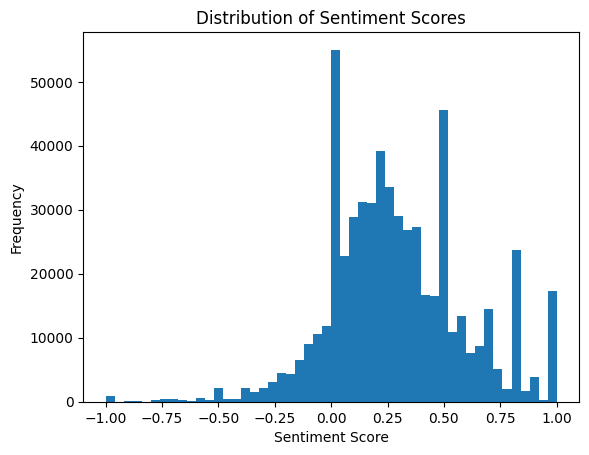

In [81]:
plt.hist(review_copy['sentiment_score'], bins=50)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


COMPARE

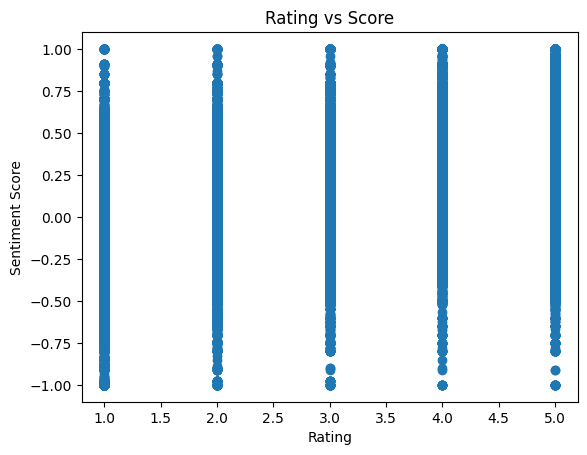

In [82]:
plt.scatter(review_copy['overall'], review_copy['sentiment_score'])
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.title('Rating vs Score')
plt.show()

## SPRINT 3: BUILDING A MACHINE LEARNING MODEL TO DEVELOP A RECOMMENDATION SYSTEM

IN ORDER TO PERFORM THIS TASK, FIRST LETS PREPARE OUR DATA FOR THE MODEL. THIS INCLUDES DEFINING OUR INDEPENDENT (features) AND DPENDENT (target) VARIABLES.  
  
Features: I'LL USE THE COLUMN "reviewText_clean"  
Target: WILL BE THE "sentiment" COLUMN

In [83]:
review_copy.head()

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,reviewText_clean,review_length,segment_length,Year,summary_clean,sentiment,sentiment_score
0,2.0,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,i bought two of these fl oz hand cream and nei...,43,Short,2010,dispensers dont work,Negative,0.270000
1,5.0,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,believe me over the years i have tried many ma...,102,Medium,2010,best hand cream ever,Positive,0.251845
2,5.0,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,great hand lotion,3,Short,2018,five stars,Positive,0.800000
3,5.0,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,this is the best for the severely dry skin on ...,12,Short,2018,five stars,Positive,0.466667
4,5.0,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,the best non oily hand cream ever it heals ove...,10,Short,2018,i always have a backup ready,Positive,1.000000


In [84]:
# FEATURE AND TARGET
X = review_copy['reviewText_clean']
y = review_copy['sentiment']

# DIVIDING DATA INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MACHINE LEARNING MODELS REQUIRE NUMERICAL INPUTS, SO WE NEED TO CONVERT THE TEXT OF THE REVIEWS INTO NUMERICAL FORMAT THROUGH A PROCESS KNOWN AS VECTORIZATION.

In [85]:
# INITIALIZE THE VECTORIZER
vectorizer = TfidfVectorizer()

# ADJUST AND TRANSFORM TRAIN DATA AND JUST TRANSFORM TEST DATA
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


SINCE WE ARE GOING TO USE A CLASSIFICATION MODEL, A GOOD STARTING POINT COULD BE THE LOGISTIC REGRESSION, FIT FOR BINARY AND MULTICLASS CLASSIFICATION

In [87]:
# Inicializar el modelo de Regresión Logística
model = LogisticRegression(max_iter= 1000)

# Entrenar el modelo
model.fit(X_train_vect, y_train)

print("Train accuracy: ", model.score(X_train_vect, y_train))
print("Test accuracy: ", model.score(X_test_vect, y_test))

Train accuracy:  0.8925948339290612
Test accuracy:  0.8835048673876321


THEN, I'LL EVALUATE THE MODEL AND COMBINE IT WITH A CONFUSSION MATRIX

In [88]:
# PREDICTION ON TEST SET
y_pred = model.predict(X_test_vect)

# MODEL EVALUATION
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.76      0.74      0.75     15980
     Neutral       0.50      0.22      0.31      8411
    Positive       0.92      0.97      0.94     90455

    accuracy                           0.88    114846
   macro avg       0.73      0.64      0.67    114846
weighted avg       0.87      0.88      0.87    114846



**Key Observations**  

**High Performance in 'Positive':**  
The model is particularly good at identifying positive reviews, with high precision and recall.  

**Moderate Performance in 'Negative**':  
Although decent, there is room for improvement in identifying negative reviews.
  
**Low Performance in 'Neutral':**  
The model struggles to correctly identify neutral reviews, as indicated by low precision and recall.

In [91]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, normalize = 'true')

print(cm)


[[0.73541927 0.04637046 0.21821026]
 [0.2577577  0.22030674 0.52193556]
 [0.01643911 0.01222707 0.97133381]]


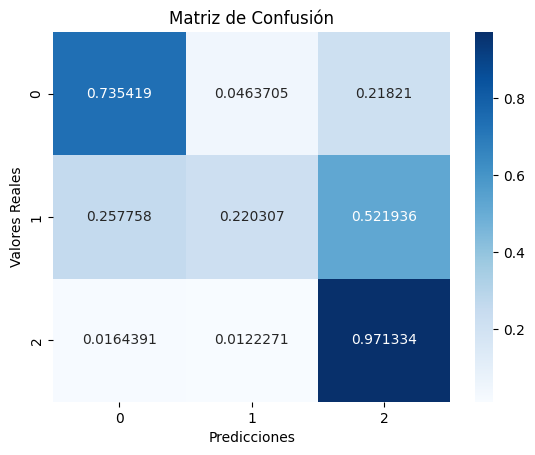

In [92]:

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

**Interpretation of the Normalized Confusion Matrix**  
  
**First Row (Negative 0):**  


1. 73.54% of the actual negative reviews were correctly classified as negative.
2. 4.64% were incorrectly classified as neutral.
3. 21.82% were incorrectly classified as positive.



**Second Row (Neutral 1):**

1. 25.78% of the actual neutral reviews were classified as negative.
2. 22.03% were correctly classified as neutral.
3. 52.19% were classified as positive.

**Third Row (Positive 2):**

1. 1.64% of the actual positive reviews were classified as negative.
2. 1.22% were classified as neutral.
3. 97.13% were correctly classified as positive.

WITH ALL THE INFORMATION WE'VE COLLECTED SO FAR IT IS POSSIBLE TO DEVELOP OUR RECOMMENDATION SYSTEM FOR AMAZON LUXURY BEAUTY PRODUCTS

LET'S AGGREGATE THE SENTIMENT SCORE FOR EACH PRODUCT, THEN SELECT THOSE WITH HIGHEST SCORES.  
FOR THIS WE HAVE TO CALCULATE THE AVERAGE SCORE FOR EACH PRODUCT (USING THE "asin" COLUMN, WHICH IS THE PRODUCT ID)

In [95]:
review_copy.head()

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,reviewText_clean,review_length,segment_length,Year,summary_clean,sentiment,sentiment_score
0,2.0,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,i bought two of these fl oz hand cream and nei...,43,Short,2010,dispensers dont work,Negative,0.270000
1,5.0,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,believe me over the years i have tried many ma...,102,Medium,2010,best hand cream ever,Positive,0.251845
2,5.0,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,great hand lotion,3,Short,2018,five stars,Positive,0.800000
3,5.0,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,this is the best for the severely dry skin on ...,12,Short,2018,five stars,Positive,0.466667
4,5.0,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,the best non oily hand cream ever it heals ove...,10,Short,2018,i always have a backup ready,Positive,1.000000


In [96]:
# CALCULATE MEAN SCORE FOR EACH PRODUCT
mean_score = review_copy.groupby('asin')['sentiment_score'].mean()
mean_score.head()

asin
B00004U9V2    0.378803
B0000531EN    0.225498
B0000532JH   -0.030604
B00005A77F    0.415543
B00005NDTD    0.495560
Name: sentiment_score, dtype: float64

NOW, LET'S ENRICH THESE AGGREGATE SCORES WITH INFORMATION FROM "metadata" DATASET, USING "title" AND "asin" COLUMNS

In [97]:
df_metadata.head()

,description,title,price,asin
0,[After a long day of handling thorny situation...,crabtree evelyn gardeners ultramoisturising ha...,$30.00,B00004U9V2
1,[If you haven't experienced the pleasures of b...,ahava bath salts,,B0000531EN
2,"[Rich, black mineral mud, harvested from the b...",ahava dead sea mineral mud 85 oz pack of 4,,B0000532JH
3,[This liquid soap with convenient pump dispens...,crabtree evelyn hand soap gardeners 101 fl oz,$15.99,B00005A77F
4,[Remember why you love your favorite blanket? ...,soy milk hand crme,$18.00,B00005NDTD


In [103]:
# SETTING "asin" COLUMN AS INDEX
df_metadata.set_index('asin', inplace=True)
mean_score = mean_score.to_frame('mean_score')

# JOIN MEAN_SCORE WITH METADATA
recommendation = df_metadata.join(mean_score, how='inner')
recommendation = recommendation[~recommendation.index.duplicated(keep='first')]

AND FINALLY LET'S SORT THROUGH THE DATA TO SELECT THE HIGHEST SCORING PRODUCTS

In [105]:
# SELECT PRODUCTS WITH HIGHEST SCORES
recommended_products = recommendation.sort_values(by='mean_score', ascending=False)

# Mostrar los productos recomendados
print(recommended_products[['title', 'mean_score']].head(10))


                                                        title  mean_score
asin                                                                     
B00O6CBPD4  natura bisse diamond white instant make up rem...         1.0
B014UC1QBK                    jouer kitten liner black 003 oz         1.0
B00DJRFFU6                          lord berry powder bronzer         1.0
B010RH76HU  marula pure beauty oil cleansing lotion 423 fl oz         1.0
B002COLXC6         leonor greyl paris tonique hydratant 52 oz         1.0
B00I9Z59G8  amouage reflection womens eau de parfum spray ...         1.0
B00KYN6XIG            natura bisse cc vitamin body lift 53 oz         1.0
B00KYC0342             arrojo shine luxe conditioner 17 fl oz         1.0
B008DW6NVC                                          crème er3         1.0
B001N444JA          mason pearson popular military hair brush         1.0


THAT'S ALL! SEE YOU SOON

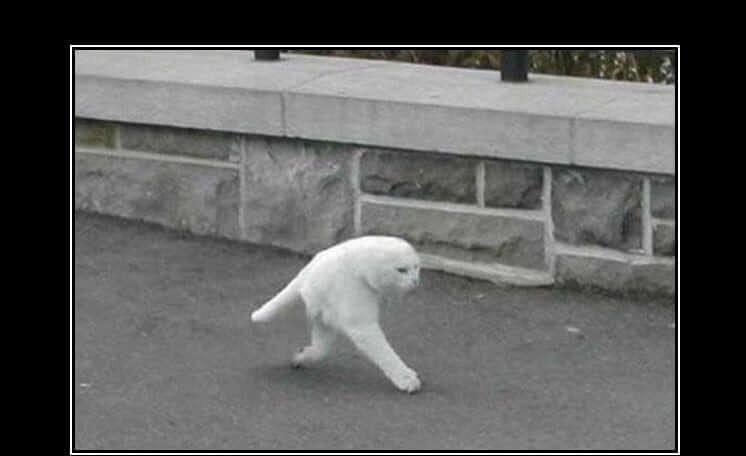
